# Introduction

About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Problem Statement

We need to analyze the data and get insights on various factors that are driving the revenue and more specific understanding the various factors that contribute to the demand(no.of cycles rented). We do various statistical tests to understand the behaviour of various features contributing to demand

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('bike_sharing.txt')

In [4]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


There are no null values present in the data

In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [7]:
# checking if these variables are categorical(although the dtype is numeric)
for col in ['season','holiday','workingday','weather']:
    print(col)
    print(df[col].value_counts())
    print('\n')
   

season
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64


holiday
0    10575
1      311
Name: holiday, dtype: int64


workingday
1    7412
0    3474
Name: workingday, dtype: int64


weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64




we see that the features 'season','holiday','workingday','weather' are categorical. 

## Distribution of numeric variables

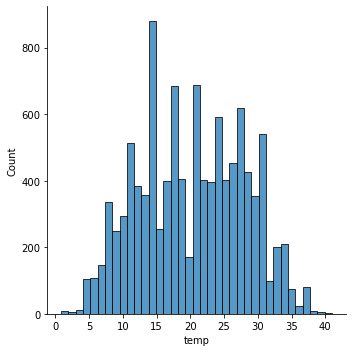

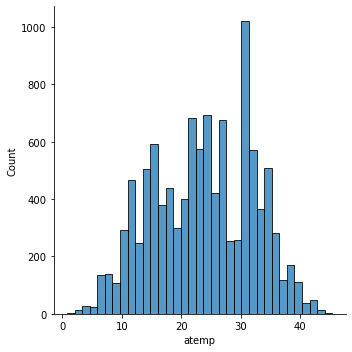

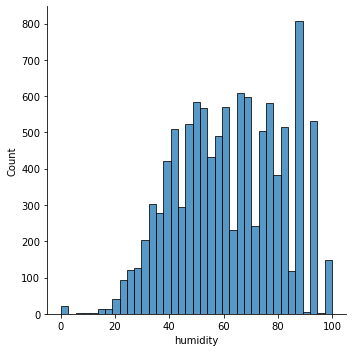

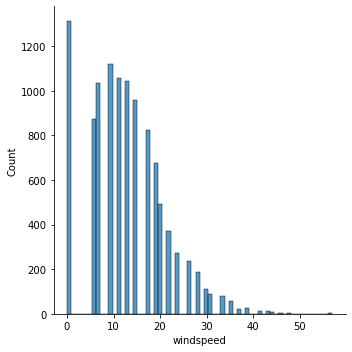

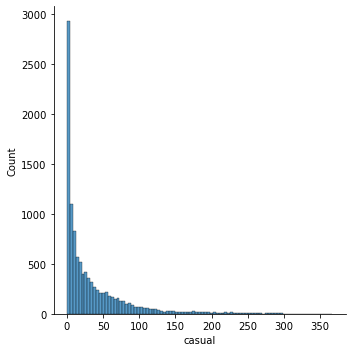

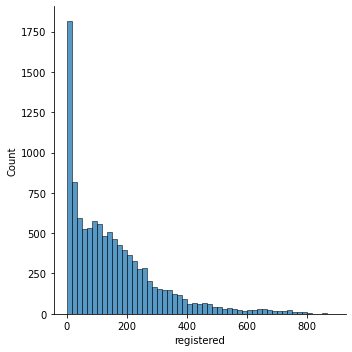

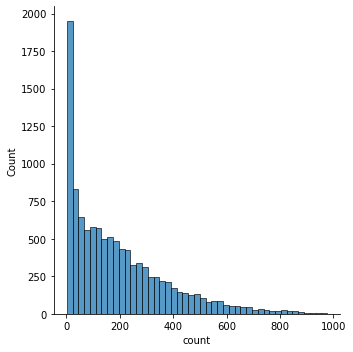

In [8]:
# distribution of all numeric features
for col in ['temp','atemp','humidity','windspeed','casual','registered','count']:
    print(sns.displot(data=df,x=col))
    
   

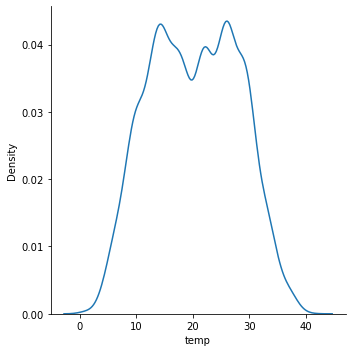

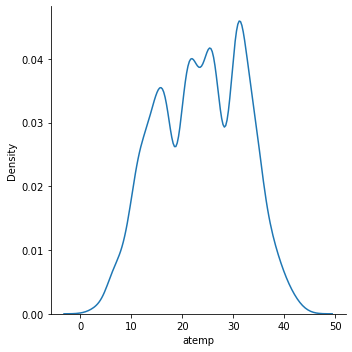

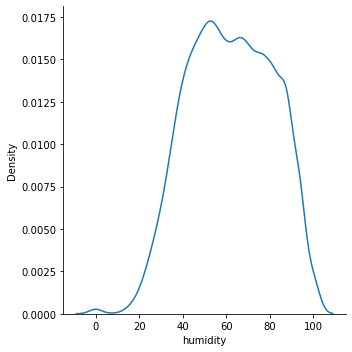

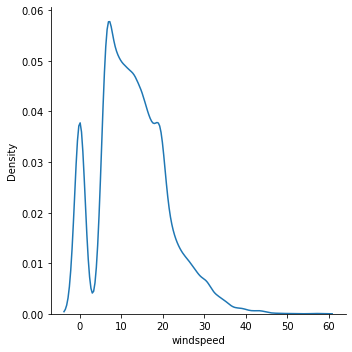

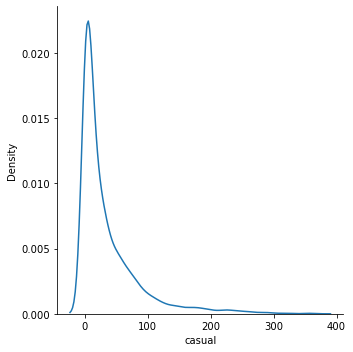

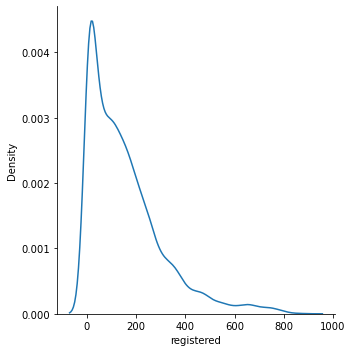

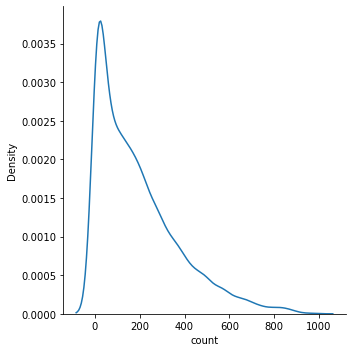

In [9]:
# distribution of all numeric features
for col in ['temp','atemp','humidity','windspeed','casual','registered','count']:
    print(sns.displot(data=df, x=col, kind="kde"))
    print('\n')
    

we see that the features 'casual','registered','count' are log-normally distributed.

we can approximate 'humidity' to normal distribution

<AxesSubplot:xlabel='season', ylabel='count'>

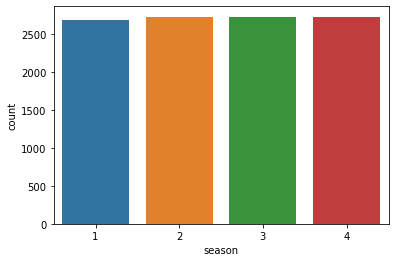

In [10]:
sns.countplot(data=df,x='season')


<AxesSubplot:xlabel='holiday', ylabel='count'>

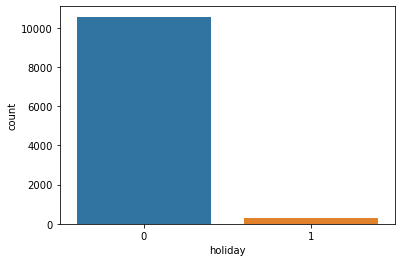

In [11]:
sns.countplot(data=df,x='holiday')

<AxesSubplot:xlabel='workingday', ylabel='count'>

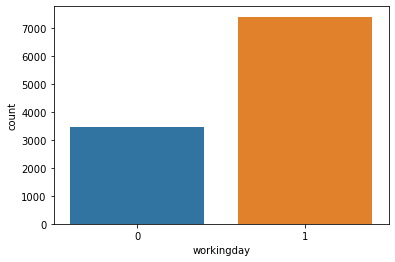

In [12]:
sns.countplot(data=df,x='workingday')

<AxesSubplot:xlabel='weather', ylabel='count'>

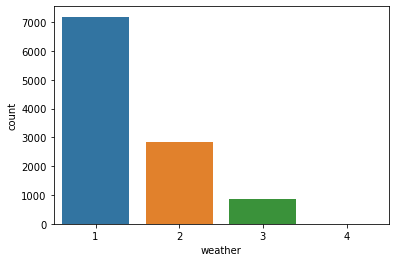

In [13]:
sns.countplot(data=df,x='weather')

In [14]:
num_features = df[['temp','atemp','humidity','windspeed','casual','registered','count']]

<AxesSubplot:>

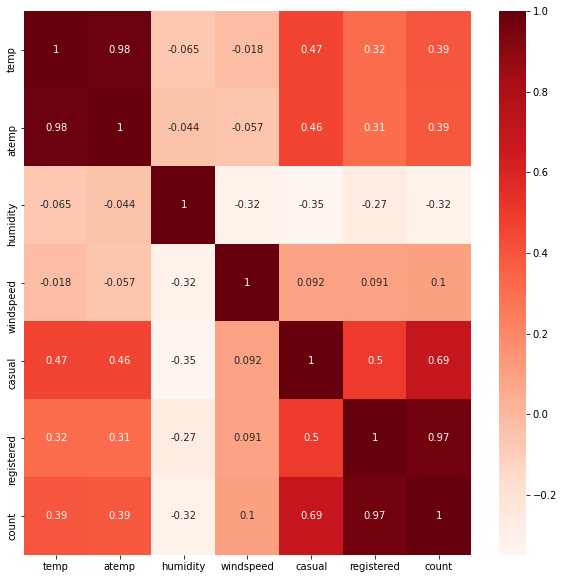

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(num_features.corr(),cmap="Reds", annot=True)

### Insight

- we can observe that the features registered and count,casual and count  are highly correlated

/Users/yaswanthseela/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='count'>

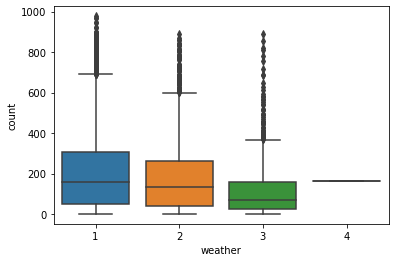

In [16]:
sns.boxplot(df['weather'],df['count'])

<AxesSubplot:xlabel='weather', ylabel='count'>

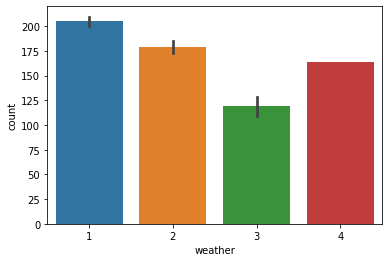

In [17]:
sns.barplot(data=df,x='weather',y='count')

<AxesSubplot:xlabel='season', ylabel='count'>

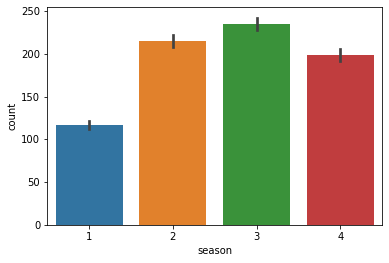

In [18]:
sns.barplot(data=df,x='season',y='count')

<AxesSubplot:xlabel='workingday', ylabel='count'>

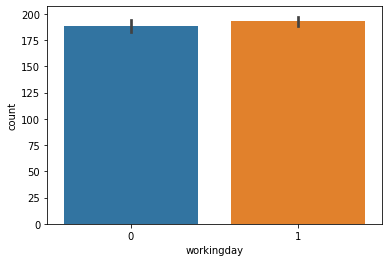

In [19]:
sns.barplot(data=df,x='workingday',y='count')

<AxesSubplot:xlabel='workingday', ylabel='count'>

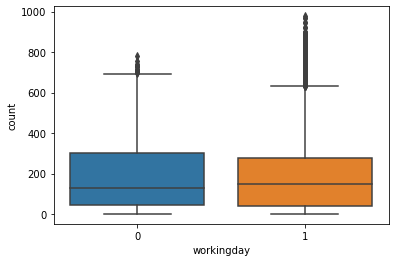

In [20]:
sns.boxplot(data=df,x='workingday',y='count')

<AxesSubplot:xlabel='weather', ylabel='count'>

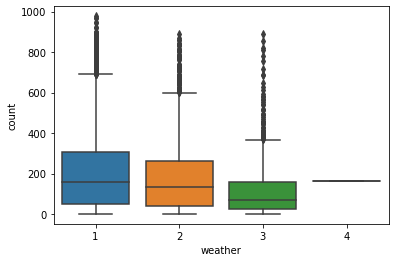

In [21]:
sns.boxplot(data=df,x='weather',y='count')

we can observe that as weather is either Light Snow or  Light Rain + Thunderstorm + Scattered clouds or Light Rain + Scattered clouds there are many outliers. So we can conclude that there's a huge demand during this kind of weather

<AxesSubplot:xlabel='season', ylabel='count'>

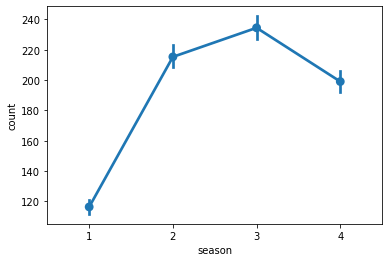

In [22]:
sns.pointplot(data=df,x='season',y='count')

<AxesSubplot:xlabel='weather', ylabel='count'>

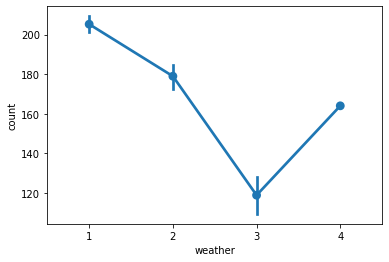

In [119]:
sns.pointplot(data=df,x='weather',y='count')

<AxesSubplot:xlabel='workingday', ylabel='count'>

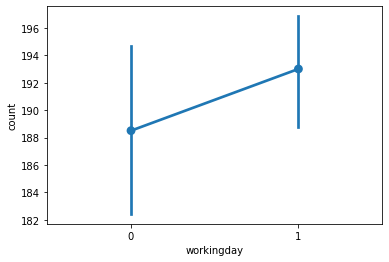

In [121]:
sns.pointplot(data=df,x='workingday',y='count')

In [ ]:
sns.pointplot(data=df,x='weather',y='count')

<AxesSubplot:xlabel='season', ylabel='count'>

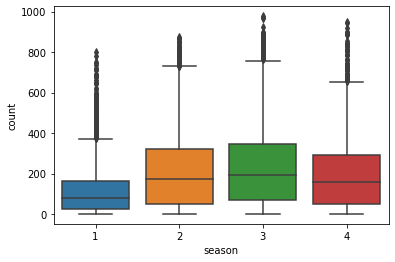

In [23]:
sns.boxplot(data=df,x='season',y='count')

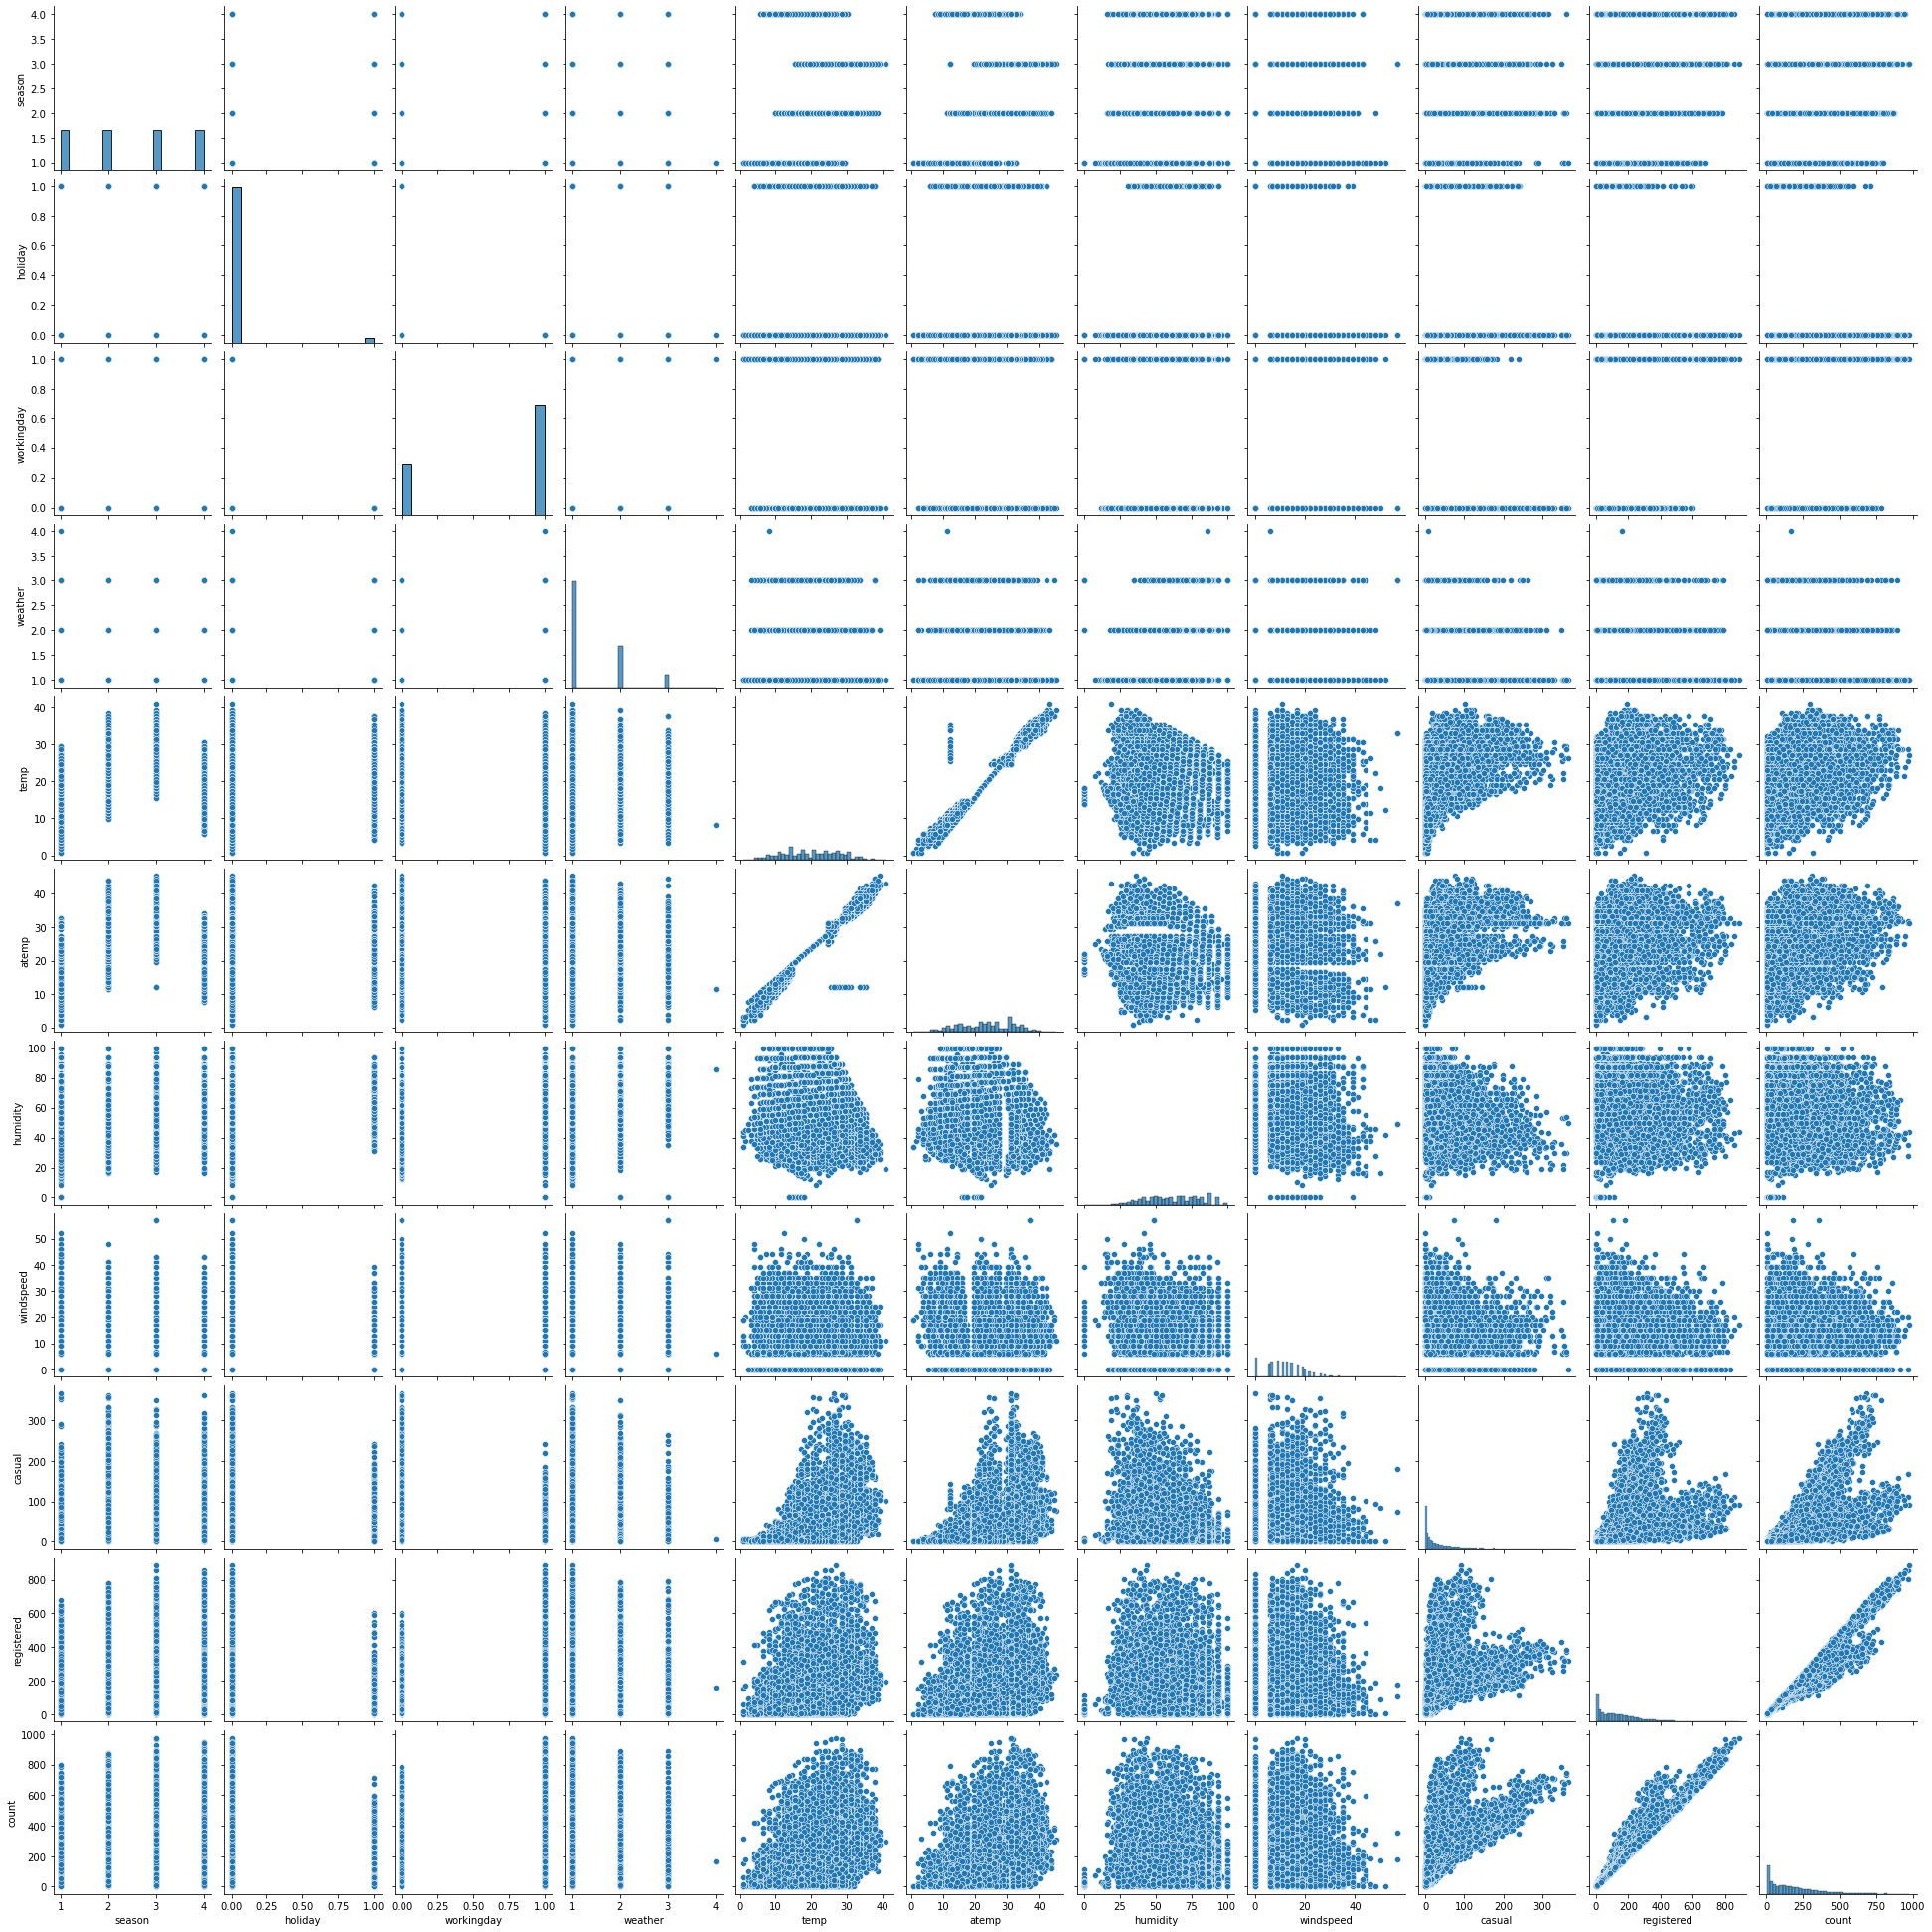

In [24]:
sns.pairplot(df)

##  Checking whether working day has an effect on the cycles rented

In [25]:
work_count = df[['workingday','count']]

In [26]:
df.groupby(['workingday'])['count'].sum()

workingday
0     654872
1    1430604
Name: count, dtype: int64

In [27]:
working = df[df['workingday'] == 1]
holiday = df[df['workingday'] == 0]

In [28]:
sample_size = 100
iterations = 1000
working_samples = [working.sample(sample_size,replace = True)['count'].mean() for i in range(iterations)]
holiday_samples = [holiday.sample(sample_size,replace = True)['count'].mean() for i in range(iterations)]

/Users/yaswanthseela/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yaswanthseela/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


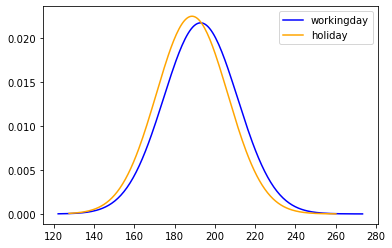

In [29]:

ax = sns.distplot(working_samples, fit_kws={"color":"blue"}, kde=False,
        fit=stats.norm, hist=None, label="workingday")
ax = sns.distplot(holiday_samples, fit_kws={"color":"orange"}, kde=False,
        fit=stats.norm, hist=None, label="holiday")
plt.legend()

plt.show()

There's a huge overlapping between the normal curves of count for working day and holiday. Let's see if there's any difference between the two population using two sample z tests

### Two sample test (two-tailed) to check whether working day has an effect on the cycles rented

### Assumptions

- The central limit theorem states that the difference in two sample means, x1 - x2, is normally distributed for large sample sizes (both n1 and n2 >= 30) regardless of the shape of the populations. Since here we are taking sample size greater than 30 we can safely assume that the normal distribution criteria is met. Also let's verify this using normality test



In [89]:
from statsmodels.graphics.gofplots import qqplot

In [104]:
x = np.array(working_samples)
y = np.array(holiday_samples)

Text(0.5, 1.0, 'Normality Test')

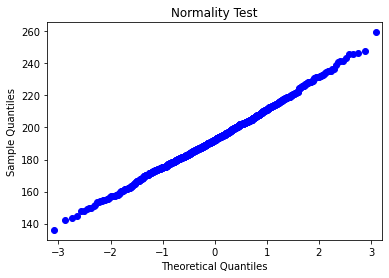

In [106]:
#normality test for working day samples
qqplot(x);
plt.title('Normality Test')


Text(0.5, 1.0, 'Normality Test')

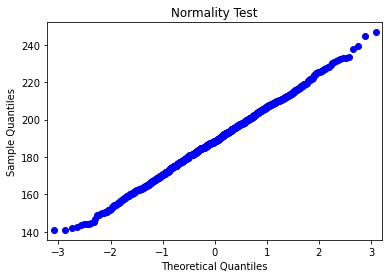

In [105]:
#normality test for holiday samples
qqplot(y);
plt.title('Normality Test')

- The samples from each population must be independent of one another. Since we have seggregated the count for both working and holidays. This assumption is met too

### Test

### H0 : 
The usage of cycles is same on both working day and holiday.(i.e there is no significant difference between the population mean(count) of wokingday and population mean(count) of holiday

### H1 :
There is a significant difference in demand on working day and holiday

 $$ test-statistic = (\bar x_{1} - \bar x_{2})/\sqrt{(\sigma_{1}^2/n_{1}) + (\sigma_{2}^2/n_{2})}$$  

In [30]:
from statsmodels.stats.weightstats import ztest as ztest

In [31]:
# two tailed test with H0 : mu1 = mu2 and H1 : mu1 != mu2
ztest(working_samples,holiday_samples,value = 0)

(5.268922219475199, 1.372270919204486e-07)

### Insight

- since the p-value is way less we can reject the null hypothesis even at 99% confidence interval. So we can conclude that there is a significant difference in the demand on working day and holiday

since we found a significant difference in the population mean(count) let's see which has higher mean.,i.e whether the usage of cycles is more on working day or on holiday 

### two sample test(one tailed)

### H0 :

 The usage of cycles is same on both working day and holiday.(i.e there is no significant difference between the population mean(count) of wokingday and population mean(count) of holiday

### H1 :

The usage of cycles is more on working days than on holidays

In [32]:
# one tailed test with H0 :mu of working_samples >= mu of holiday_samples
#H1 : mu of working_samples < mu of holiday_samples
ztest(working_samples,holiday_samples,alternative = 'smaller')

(5.268922219475199, 0.999999931386454)

### Insight

Since p-value is way larger we fail to reject the null hypothesis and thus we can conclude that the usage of cycles on working day is higher than on the holiday

## Checking if no.of cycles rented is varying as per the season

In [34]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

- There are 4 categories in season and the dependent variable is count

In [35]:
sample_size = 100
iterations = 1000
season_1 = [df[df['season'] == 1].sample(sample_size,replace = True)['count'].mean() for i in range(iterations)]
season_2 = [df[df['season'] == 2].sample(sample_size,replace = True)['count'].mean() for i in range(iterations)]
season_3 = [df[df['season'] == 3].sample(sample_size,replace = True)['count'].mean() for i in range(iterations)]
season_4 = [df[df['season'] == 4].sample(sample_size,replace = True)['count'].mean() for i in range(iterations)]

/Users/yaswanthseela/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yaswanthseela/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yaswanthseela/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

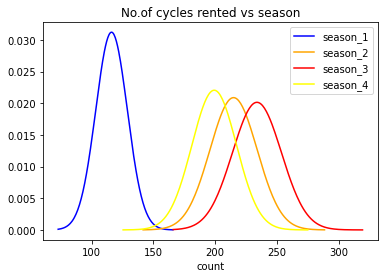

In [36]:
ax = sns.distplot(season_1, fit_kws={"color":"blue"}, kde=False,
        fit=stats.norm, hist=None, label="season_1")
ax = sns.distplot(season_2, fit_kws={"color":"orange"}, kde=False,
        fit=stats.norm, hist=None, label="season_2")
ax = sns.distplot(season_3, fit_kws={"color":"red"}, kde=False,
        fit=stats.norm, hist=None, label="season_3")
ax = sns.distplot(season_4, fit_kws={"color":"yellow"}, kde=False,
        fit=stats.norm, hist=None, label="season_4")
plt.legend()
plt.xlabel('count')
plt.title('No.of cycles rented vs season')
plt.show()

### One way ANOVA to find if the no.of cycles rented is varying across seasons

### Assumptions

#### 1)Assumption of Normality

Text(0.5, 1.0, 'Normality Test')

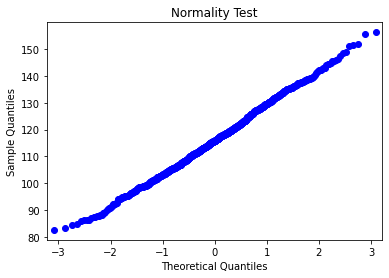

In [111]:
#normality test for season_1 samples
qqplot(np.array(season_1));
plt.title('Normality Test')

Text(0.5, 1.0, 'Normality Test')

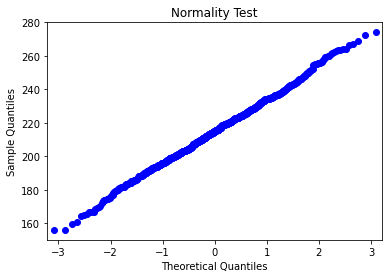

In [112]:
#normality test for season_2 samples
qqplot(np.array(season_2));
plt.title('Normality Test')

Text(0.5, 1.0, 'Normality Test')

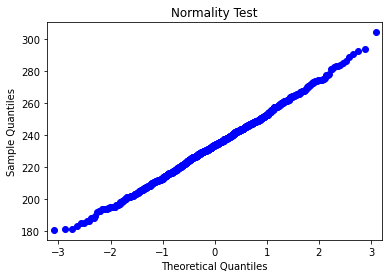

In [114]:
#normality test for season_3 samples
qqplot(np.array(season_3));
plt.title('Normality Test')

Text(0.5, 1.0, 'Normality Test')

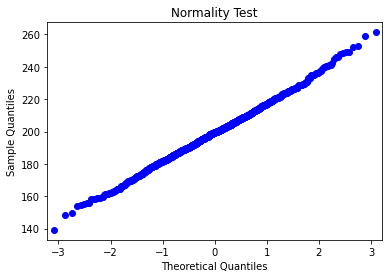

In [115]:
#normality test for season_4 samples
qqplot(np.array(season_4));
plt.title('Normality Test')


From above we see that the responses for each factor level have a normal population distribution. Thus assumption of normality is met

#### 2)Assumption of constant variance across groups - Levene's Test

In order to perform ANOVA test we assume that the varaince across the groups is same. This is tested using Levene's test

In [82]:
import scipy.stats as stats

#Levene's test centered at the median
stats.levene(season_1, season_2, season_3,season_4, center='median')

LeveneResult(statistic=52.54485510817793, pvalue=2.6495299893498613e-33)

In [84]:
#Levene's test centered at the mean
stats.levene(season_1, season_2, season_3,season_4, center='mean')

LeveneResult(statistic=52.48453225063474, pvalue=2.8889383174781397e-33)

- In both methods p-value is very small and hence we reject the null hypothesis and conclude that the varaiance is different across different groups. So our assumption that variance across groups is same is not met

Although the assumption of constant variance across groups is not met, let's go and do ANOVA test

### One way ANOVA Test

### H0 :

There is no significant difference in the no.of cycles rented based on the varying season i.e

$$ \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4} = \mu_{0} $$

### H1 :

There's difference in atleast one of the seasons in the no.of cycles rented i.e

$$ \mu_{i}  \ne  \mu_{0}     $$

  $$\text{for atleast one i in {1,2,3,4}}$$

In [37]:
#one way anova test
import scipy.stats as stats 
stats.f_oneway(season_1,season_2,season_3,season_4) 

F_onewayResult(statistic=8621.476422079344, pvalue=0.0)

### Insight

- Since the p-value is almost 0, we reject the null hypothesis and conclude that there is a significant difference in the no.of cycles rented depending on the season

## Tukey's Test

From the above anova tes we conclude that there is a statistically significant difference between the means of four seasons. Let's find out exactly which groups are different from each other by conducting Tukey's test

In [38]:
season_data = {"season_1": season_1,"season_2": season_2,"season_3":season_3,"season_4":season_4}

In [39]:
season_df = pd.DataFrame(season_data)

In [40]:
season_df

,season_1,season_2,season_3,season_4
0,132.39,208.99,265.49,205.01
1,128.32,223.00,220.77,182.08
2,120.31,226.29,232.03,241.38
3,108.13,201.51,228.53,215.71
4,104.14,202.74,214.07,192.51
...,...,...,...,...
995,113.76,214.38,181.38,233.16
996,119.76,203.79,239.47,191.95
997,115.18,232.13,237.70,195.28
998,110.84,200.65,242.63,175.94


In [41]:
season_df = season_df.unstack()

In [42]:
season_df

season_1  0      132.39
          1      128.32
          2      120.31
          3      108.13
          4      104.14
                  ...  
season_4  995    233.16
          996    191.95
          997    195.28
          998    175.94
          999    181.60
Length: 4000, dtype: float64

In [43]:
season_df = pd.DataFrame(season_df)

In [44]:
season_df = season_df.reset_index()
season_df.drop('level_1',axis = 1,inplace=True)

In [45]:
season_df.rename(columns = {'level_0':'Season',0:"Count"},inplace = True)

In [46]:
season_df.head(4)

,Season,Count
0,season_1,132.39
1,season_1,128.32
2,season_1,120.31
3,season_1,108.13


In [47]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [48]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=season_df['Count'],
                          groups=season_df['Season'],
                          alpha=0.05)

#display results
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj  lower    upper   reject
---------------------------------------------------------
season_1 season_2  98.7319 0.001  96.7012 100.7626   True
season_1 season_3 117.6573 0.001 115.6266  119.688   True
season_1 season_4  83.0863 0.001  81.0557   85.117   True
season_2 season_3  18.9254 0.001  16.8947  20.9561   True
season_2 season_4 -15.6456 0.001 -17.6762 -13.6149   True
season_3 season_4  -34.571 0.001 -36.6016 -32.5403   True
---------------------------------------------------------


### Insight

- From the above Tukey's test we can conclude that no two seasons have similar means i.e the no.of cycles rented is different in all the seasons

## Checking if no.of cycles rented is varying as per the weather

In [49]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Since there is only one record with weather 4, we can ignore that see if the mean is varying across the three groups

In [50]:
sample_size = 100
iterations = 1000
weather_1 = [df[df['weather'] == 1].sample(sample_size,replace = True)['count'].mean() for i in range(iterations)]
weather_2 = [df[df['weather'] == 2].sample(sample_size,replace = True)['count'].mean() for i in range(iterations)]
weather_3 = [df[df['weather'] == 3].sample(sample_size,replace = True)['count'].mean() for i in range(iterations)]


/Users/yaswanthseela/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yaswanthseela/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yaswanthseela/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

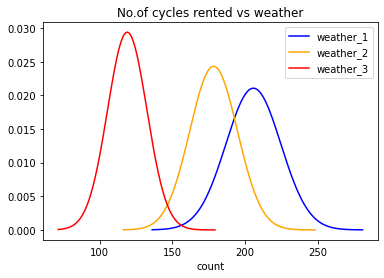

In [51]:
ax = sns.distplot(weather_1, fit_kws={"color":"blue"}, kde=False,
        fit=stats.norm, hist=None, label="weather_1")
ax = sns.distplot(weather_2, fit_kws={"color":"orange"}, kde=False,
        fit=stats.norm, hist=None, label="weather_2")
ax = sns.distplot(weather_3, fit_kws={"color":"red"}, kde=False,
        fit=stats.norm, hist=None, label="weather_3")

plt.legend()
plt.xlabel('count')
plt.title('No.of cycles rented vs weather')
plt.show()

### One way ANOVA to find if the no.of cycles rented is varying across different weather conditions

### Assumptions

#### 1) Assumption of Normality

Text(0.5, 1.0, 'Normality Test')

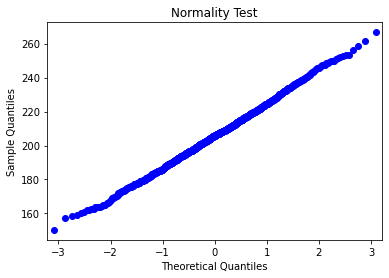

In [116]:
#normality test for weather_1 samples
qqplot(np.array(weather_1));
plt.title('Normality Test')

Text(0.5, 1.0, 'Normality Test')

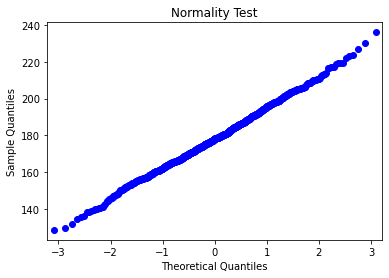

In [117]:
#normality test for weather_2 samples
qqplot(np.array(weather_2));
plt.title('Normality Test')

Text(0.5, 1.0, 'Normality Test')

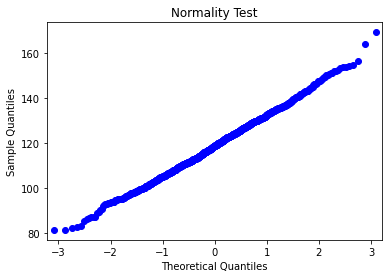

In [118]:
#normality test for weather_3 samples
qqplot(np.array(weather_3));
plt.title('Normality Test')

From above we see that the responses for each factor level have a normal population distribution. Thus assumption of normality is met

#### 2) Assumption of constant variance across groups - Levene's Test


In order to perform ANOVA test we assume that the varaince across the groups is same. This is tested using Levene's test

In [85]:
import scipy.stats as stats

#Levene's test centered at the median
stats.levene(weather_1, weather_2, weather_3, center='median')

LeveneResult(statistic=43.24430213157361, pvalue=3.0558091676752617e-19)

In [86]:
#Levene's test centered at the mean
stats.levene(weather_1, weather_2, weather_3, center='mean')

LeveneResult(statistic=43.257608657205985, pvalue=3.016542139343467e-19)

- In both methods p-value is very small and hence we reject the null hypothesis and conclude that the varaiance is different across different groups. So our assumption that variance across groups is same is not met


Although the assumption of constant variance across groups is not met, let's go and do ANOVA test

### H0 :

There is no significant difference in the no.of cycles rented based on the different weather conditions i.e

$$ \mu_{1} = \mu_{2} = \mu_{3}  = \mu_{0} $$

### H1 :

There's difference in the no.of cycles rented in atleast one of the weather conditions i.e

$$ \mu_{i}  \ne  \mu_{0}     $$

  $$\text{for atleast one i in {1,2,3}}$$

In [52]:
#one way anova test
import scipy.stats as stats 
stats.f_oneway(weather_1,weather_2,weather_3) 

F_onewayResult(statistic=7286.331972691508, pvalue=0.0)

### Insight

- Since the p-value is almost 0, we reject the null hypothesis and conclude that there is a significant difference in the no.of cycles rented depending on the weather condition

## Tukey's Test

From the above anova tes we conclude that there is a statistically significant difference between the means of 3 weather conditions. Let's find out exactly which groups are different from each other by conducting Tukey's test

In [53]:
weather_data = {"weather_1": weather_1,"weather_2": weather_2,"weather_3":weather_3}

In [54]:
weather_df = pd.DataFrame(weather_data)

In [55]:
weather_df.head(4)

,weather_1,weather_2,weather_3
0,212.06,157.15,135.89
1,192.09,197.37,118.17
2,177.07,183.72,126.35
3,218.75,170.68,112.74


In [56]:
weather_df = weather_df.unstack()

In [57]:
weather_df = pd.DataFrame(weather_df)

In [58]:
weather_df = weather_df.reset_index()
weather_df.drop('level_1',axis = 1,inplace=True)

In [59]:
weather_df.rename(columns = {'level_0':'weather',0:"Count"},inplace = True)

In [60]:
weather_df.head(3)

,weather,Count
0,weather_1,212.06
1,weather_1,192.09
2,weather_1,177.07


In [61]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=weather_df['Count'],
                          groups=weather_df['weather'],
                          alpha=0.05)

#display results
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj  lower    upper   reject
-----------------------------------------------------------
weather_1 weather_2 -27.3937 0.001 -29.1199 -25.6674   True
weather_1 weather_3 -86.9118 0.001  -88.638 -85.1855   True
weather_2 weather_3 -59.5181 0.001 -61.2443 -57.7919   True
-----------------------------------------------------------


### Insight

- From the above Tukey's test we can conclude that no two weather conditions have similar means. i.e the no.of cycles rented is different in different weather conditions

## Check if Weather is dependent on the season

Let's conduct a chi-square test to see if both weather and season are related to each other or not 

### H0 :

The two variables season and weather are independent.


### H1 :

The two variables are not independent.

In [62]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [63]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Since there's only one observation with weather 4 ,let's ignore this and go with 3 categories in weather

In [64]:
data = df[df['weather'] != 4]

In [65]:
chsq_df = pd.crosstab(data['season'],data['weather'])

In [66]:
chsq_df

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


In [67]:
chsq_data = [[1759,715,211],
         [1801,708,224],
         [1930,604,199],
         [1702,807,225]]

In [68]:
stats.chi2_contingency(chsq_data)

(46.10145731073249,
 2.8260014509929343e-08,
 6,
 array([[1774.04869086,  699.06201194,  211.8892972 ],
        [1805.76352779,  711.55920992,  215.67726229],
        [1805.76352779,  711.55920992,  215.67726229],
        [1806.42425356,  711.81956821,  215.75617823]]))

### Insight

- From above we see that for the calculated test-statistc with degrees of freedom 6 , we got a very low P-value. So we reject the null hypothesis and conclude that there is some relationship between the season and weather, i.e weather and season are dependent 

## Overall Insights and Recommendations

- we can observe that the features registered and count,casual and count are highly correlated


- we can conclude that there is a significant difference in the demand on working day and holiday and we can further conclude that the usage of cycles on working day is higher than on the holiday



- there is a significant difference in the no.of cycles rented depending on the season and no two groups have a closer mean 



- Since there is a significant difference in the no.of cycles rented depending on the season we could further study the behaviour in each season and see what factors are driving the demand in each season  



- there is a significant difference in the no.of cycles rented depending on the weather condition and no two groups have a closer mean 


- Since there is a significant difference in the no.of cycles rented depending on the weather conditions we could further study the behaviour in each weather condition and see what factors are driving the demand in each weather condition 



- there is some relationship between the season and weather, i.e weather and season are dependent


- Owing to the significant difference between the usage of cycles on working day and holiday and infact higher usage of cycles on working days than on holidays, certain campaigns may be conducted to increase the number of cycles rented on holidays in order to boost the no.of cycles rented(demand) on holidays